# EU Energy Consumption by Major Energy Source Analysis (1990-2024)

## Introduction

An analysis of energy consumption by major energy source over time in the EU countries.

Energy consumption is analysed by major energy source categories as defined by Eurostat: petroleum and oil products, solid fossil fuels, natural gas, and renewables. These categories represent distinct fuel types with different end uses and environmental impacts, allowing meaningful comparison of long-term energy consumption trends and the ongoing energy transition.
Data sets are sourced from Eurostat's energy statistics database, which provides comprehensive and harmonized data on energy production, consumption, and trade across EU member states. Energy source consumption data for energy use and non-energy use is extracted for each major fuel type from 1990 to the most recent available year (2024, provisional). All datasets contain annual data, expressed in thousands of tonnes of oil equivalent (KTOE) The renewables dataset includes various renewable energy sources such as wind, hydro, solar,geothermal, biomass, and biogases.

How has fossil fuel usage changed over time?

Is gas replacing solid fuels?

Are renewables increasing relative to oil?

## Data Import and Cleaning

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import os
from sqlalchemy import create_engine


In [2]:
# Import data from Eurostat API for oil and petroleum derivatives consumption
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/nrg_bal_c/1.0/*.*.*.*.*?c[freq]=A&c[nrg_bal]=GAE,NRGSUP,PEC2020-2030,FEC2020-2030,AFC,FC_NE,FC_E&c[siec]=O4000XBIO,O4651,O4652XR5210B,O4653,O4661XR5230B,O4671XR5220B,O4695&c[unit]=KTOE&c[geo]=BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,UK,BA,ME,MD,MK,GE,AL,RS,TR,UA,XK&c[TIME_PERIOD]=2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990&compress=false&format=csvdata&formatVersion=2.0&lang=en&labels=name'
oil_and_petroleum_df = pd.read_csv(url)
oil_and_petroleum_df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,nrg_bal,Energy balance,siec,Standard international energy product classification (SIEC),unit,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,O4000XBIO,Oil and petroleum products (excluding biofuel ...,KTOE,...,AL,Albania,1990,NaN,891.783,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,O4000XBIO,Oil and petroleum products (excluding biofuel ...,KTOE,...,AL,Albania,1991,NaN,561.706,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,O4000XBIO,Oil and petroleum products (excluding biofuel ...,KTOE,...,AL,Albania,1992,NaN,416.136,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,O4000XBIO,Oil and petroleum products (excluding biofuel ...,KTOE,...,AL,Albania,1993,NaN,380.111,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,O4000XBIO,Oil and petroleum products (excluding biofuel ...,KTOE,...,AL,Albania,1994,NaN,464.489,NaN,NaN,NaN,NaN,NaN


In [3]:
oil_and_petroleum_df.shape

(45899, 21)

In [4]:
oil_and_petroleum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45899 entries, 0 to 45898
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   STRUCTURE                                                    45899 non-null  object 
 1   STRUCTURE_ID                                                 45899 non-null  object 
 2   STRUCTURE_NAME                                               45899 non-null  object 
 3   freq                                                         45899 non-null  object 
 4   Time frequency                                               45899 non-null  object 
 5   nrg_bal                                                      45899 non-null  object 
 6   Energy balance                                               45899 non-null  object 
 7   siec                                                         45899 non-null 

In [5]:
oil_and_petroleum_df.columns.tolist()

['STRUCTURE',
 'STRUCTURE_ID',
 'STRUCTURE_NAME',
 'freq',
 'Time frequency',
 'nrg_bal',
 'Energy balance',
 'siec',
 'Standard international energy product classification (SIEC)',
 'unit',
 'Unit of measure',
 'geo',
 'Geopolitical entity (reporting)',
 'TIME_PERIOD',
 'Time',
 'OBS_VALUE',
 'Observation value',
 'OBS_FLAG',
 'Observation status (Flag) V2 structure',
 'CONF_STATUS',
 'Confidentiality status (flag)']

In [6]:
oil_and_petroleum_df.isna().sum()

STRUCTURE                                                          0
STRUCTURE_ID                                                       0
STRUCTURE_NAME                                                     0
freq                                                               0
Time frequency                                                     0
nrg_bal                                                            0
Energy balance                                                     0
siec                                                               0
Standard international energy product classification (SIEC)        0
unit                                                               0
Unit of measure                                                    0
geo                                                                0
Geopolitical entity (reporting)                                    0
TIME_PERIOD                                                        0
Time                              

In [7]:
# Import data from Eurostat API for solid fossil fuels consumption
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/nrg_bal_c/1.0/*.*.*.*.*?c[freq]=A&c[nrg_bal]=GAE,NRGSUP,PEC2020-2030,FEC2020-2030,AFC,FC_NE,FC_E&c[siec]=C0000X0350-0370,C0110,C0121,C0129,C0220,C0311,C0312,C0350,P1000,P1100,O4694&c[unit]=KTOE&c[geo]=BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,UK,BA,ME,MD,MK,GE,AL,RS,TR,UA,XK&c[TIME_PERIOD]=2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990&compress=false&format=csvdata&formatVersion=2.0&lang=en&labels=name'
solid_fossil_fuels_df = pd.read_csv(url, low_memory= False)
solid_fossil_fuels_df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,nrg_bal,Energy balance,siec,Standard international energy product classification (SIEC),unit,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,C0000X0350-0370,Solid fossil fuels,KTOE,...,AL,Albania,1990,NaN,571.289,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,C0000X0350-0370,Solid fossil fuels,KTOE,...,AL,Albania,1991,NaN,328.198,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,C0000X0350-0370,Solid fossil fuels,KTOE,...,AL,Albania,1992,NaN,91.786,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,C0000X0350-0370,Solid fossil fuels,KTOE,...,AL,Albania,1993,NaN,45.188,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,C0000X0350-0370,Solid fossil fuels,KTOE,...,AL,Albania,1994,NaN,39.511,NaN,NaN,NaN,NaN,NaN


In [8]:
# Import data from Eurostat API for natural gas
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/nrg_bal_c/1.0/*.*.*.*.*?c[freq]=A&c[nrg_bal]=GAE,NRGSUP,PEC2020-2030,FEC2020-2030,AFC,FC_NE,FC_E&c[siec]=G3000&c[unit]=KTOE&c[geo]=BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,UK,BA,ME,MD,MK,GE,AL,RS,TR,UA,XK&c[TIME_PERIOD]=2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990&compress=false&format=csvdata&formatVersion=2.0&lang=en&labels=name'
natural_gas_df = pd.read_csv(url)
natural_gas_df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,nrg_bal,Energy balance,siec,Standard international energy product classification (SIEC),unit,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,G3000,Natural gas,KTOE,...,AL,Albania,1990,NaN,203.203,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,G3000,Natural gas,KTOE,...,AL,Albania,1991,NaN,118.229,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,G3000,Natural gas,KTOE,...,AL,Albania,1992,NaN,85.641,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,G3000,Natural gas,KTOE,...,AL,Albania,1993,NaN,68.444,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,G3000,Natural gas,KTOE,...,AL,Albania,1994,NaN,43.573,NaN,NaN,NaN,NaN,NaN


In [9]:
# Import data from Eurostat API for renewables consumption
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/nrg_bal_c/1.0/*.*.*.*.*?c[freq]=A&c[nrg_bal]=GAE,NRGSUP,PEC2020-2030,FEC2020-2030,AFC,FC_NE,FC_E&c[siec]=RA000,RA100,RA200,RA300,RA410,RA420,RA500,R5110-5150_W6000RI,R5210P,R5220P&c[unit]=KTOE&c[geo]=BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,UK,BA,ME,MD,MK,GE,AL,RS,TR,UA,XK&c[TIME_PERIOD]=2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990&compress=false&format=csvdata&formatVersion=2.0&lang=en&labels=name'
renewables_df = pd.read_csv(url)
renewables_df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,nrg_bal,Energy balance,siec,Standard international energy product classification (SIEC),unit,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,R5110-5150_W6000RI,Primary solid biofuels,KTOE,...,AL,Albania,1990,NaN,363.022,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,R5110-5150_W6000RI,Primary solid biofuels,KTOE,...,AL,Albania,1991,NaN,363.022,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,R5110-5150_W6000RI,Primary solid biofuels,KTOE,...,AL,Albania,1992,NaN,363.022,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,R5110-5150_W6000RI,Primary solid biofuels,KTOE,...,AL,Albania,1993,NaN,346.494,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:NRG_BAL_C(1.0),Complete energy balances,A,Annual,AFC,Available for final consumption,R5110-5150_W6000RI,Primary solid biofuels,KTOE,...,AL,Albania,1994,NaN,330.730,NaN,NaN,NaN,NaN,NaN


In [10]:
def clean_data(df):
    """
    Cleans a Eurostat energy dataset and aggregates it so that:
    - One row per country per year
    - Consumption summed across all usage categories

    Returns:
    --------
    pd.DataFrame
        Cleaned, aggregated dataframe
    """

    # 1. Drop unnecessary columns
    columns_to_drop = [
        'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
        'nrg_bal', 'Energy balance', 'siec',
        'Standard international energy product classification (SIEC)',
        'Unit of measure', 'unit', 'geo', 'Time', 'Observation value',
        'OBS_FLAG', 'Observation status (Flag) V2 structure',
        'CONF_STATUS', 'Confidentiality status (flag)'
    ]

    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # 2. Rename columns
    df = df.rename(columns={
        'TIME_PERIOD': 'Year',
        'Geopolitical entity (reporting)': 'Country',
        'OBS_VALUE': 'Consumption_KTOE'
    })

    # 3. Convert year to int
    df['Year'] = df['Year'].astype(int)

    # 4. Ensure numeric consumption
    df['Consumption_KTOE'] = pd.to_numeric(df['Consumption_KTOE'], errors='coerce')

    # 5. Drop missing consumption values
    df = df.dropna(subset=['Consumption_KTOE'])

    # 6. Aggregate by Country and Year
    df = (
        df.groupby(['Country', 'Year'], as_index=False)
          .agg({'Consumption_KTOE': 'sum'})
    )

    return df


In [11]:
oil_petrol_clean = clean_data(oil_and_petroleum_df)
oil_petrol_clean.head()

,Country,Year,Consumption_KTOE
0,Albania,1990,4884.643
1,Albania,1991,3349.616
2,Albania,1992,2540.534
3,Albania,1993,2469.427
4,Albania,1994,3099.698


In [12]:
solid_fossil_fuels_clean = clean_data(solid_fossil_fuels_df)
solid_fossil_fuels_clean.head()

,Country,Year,Consumption_KTOE
0,Albania,1990,4744.548
1,Albania,1991,2848.038
2,Albania,1992,821.954
3,Albania,1993,481.800
4,Albania,1994,428.130


In [13]:
natural_gas_clean = clean_data(natural_gas_df)
natural_gas_clean.head()

,Country,Year,Consumption_KTOE
0,Albania,1990,812.812
1,Albania,1991,472.916
2,Albania,1992,342.564
3,Albania,1993,273.776
4,Albania,1994,174.292


In [14]:
renewables_clean = clean_data(renewables_df)
renewables_clean.head()

,Country,Year,Consumption_KTOE
0,Albania,1990,3883.712
1,Albania,1991,4114.150
2,Albania,1992,4013.720
3,Albania,1993,3911.762
4,Albania,1994,3942.832


## Storing Cleaned Data in MySQL Database

After cleaning the Eurostat datasets in Python, the processed data was stored in a MySQL database. This allows efficient querying, reuse of cleaned data, and demonstrates database integration within a data analysis pipeline.
MySQL connector for Python has been installed in the environment using `pip install mysql-connector-python`.  A database named `energy_data` was created in MySQL Workbench to store the cleaned datasets. A table was created in the database as follows:
```sql
CREATE TABLE energy_consumption (
    id INT AUTO_INCREMENT PRIMARY KEY,
    country VARCHAR(100),
    year INT,
    fuel_type VARCHAR(50),
    consumption_ktoe DOUBLE
);
```

A database connection was established and the cleaned datasets were inserted into the `energy_consumption` table using the code belo. Database credentials were not hard-coded in the source code.
Instead, environment variables were used to securely manage authentication details, following best security practices.

In [19]:
# Establish MySQL database connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=os.getenv("MYSQL_PASSWORD"),
    database="energy_data"
)

cursor = conn.cursor()


In [20]:
# Add fuel type column to each dataframe
oil_petrol_clean['fuel_type'] = 'Oil & Petroleum'
solid_fossil_fuels_clean['fuel_type'] = 'Solid Fossil Fuels'
natural_gas_clean['fuel_type'] = 'Natural Gas'
renewables_clean['fuel_type'] = 'Renewables'


In [21]:
# Combine all cleaned dataframes into one for insertion
all_energy = pd.concat(
    [oil_petrol_clean, natural_gas_clean, solid_fossil_fuels_clean, renewables_clean],
    ignore_index=True
)


In [22]:
# Insert data into MySQL database
insert_query = """
INSERT INTO energy_consumption (country, year, fuel_type, consumption_ktoe)
VALUES (%s, %s, %s, %s)
"""

data_to_insert = [
    (row.Country, int(row.Year), row.fuel_type, float(row.Consumption_KTOE))
    for row in all_energy.itertuples()
]

cursor.executemany(insert_query, data_to_insert)
conn.commit()


In [27]:
 # Test data insertion by querying the database
query = "SELECT * FROM energy_consumption LIMIT 10;"
df_test = pd.read_sql(query, conn)
df_test


C:\Users\annal\AppData\Local\Temp\ipykernel_32584\2907841894.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_test = pd.read_sql(query, conn)


,id,country,year,fuel_type,consumption_ktoe
0,1,Albania,1990,Oil & Petroleum,4884.643
1,2,Albania,1991,Oil & Petroleum,3349.616
2,3,Albania,1992,Oil & Petroleum,2540.534
3,4,Albania,1993,Oil & Petroleum,2469.427
4,5,Albania,1994,Oil & Petroleum,3099.698
5,6,Albania,1995,Oil & Petroleum,2882.988
6,7,Albania,1996,Oil & Petroleum,2849.472
7,8,Albania,1997,Oil & Petroleum,2308.682
8,9,Albania,1998,Oil & Petroleum,3060.434
9,10,Albania,1999,Oil & Petroleum,5975.765


## Data Analysis and Visualization

In [48]:
oil_petrol_pivot =  oil_petrol_clean.pivot_table(
        index='Country',
        columns='Year',
        values='Consumption_KTOE',
        aggfunc='sum'
    )
oil_petrol_pivot.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4884.643,3349.616,2540.534,2469.427,3099.698,2882.988,2849.472,2308.682,3060.434,5975.765,...,8188.672,8341.467,8136.627,7566.960,7826.043,6747.810,6633.084,6684.760,6343.524,NaN
Austria,53102.401,58212.893,56412.410,57842.477,56598.524,58895.155,66091.024,63411.050,68703.952,66526.383,...,69262.380,71662.032,72442.903,72435.186,72959.095,65780.956,69454.549,69487.021,63386.823,60572.235
Belgium,85141.901,90894.331,94703.027,93807.147,102729.050,106001.967,110166.193,111656.076,111888.945,110054.422,...,103128.683,102560.574,102037.995,105972.017,95037.038,89876.701,94631.635,89975.920,83776.890,85601.183
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9226.561,10874.856,10790.717,10948.259,12279.559,11471.193,12843.421,12476.576,12623.944,NaN
Bulgaria,37656.830,25529.808,24239.298,24928.966,19955.457,20423.411,19423.036,16668.048,20550.418,19172.827,...,18433.150,16701.823,16855.594,20018.206,19084.734,19931.280,23274.843,19115.680,20333.466,21878.167


In [49]:
solid_fossil_fuels_pivot =  solid_fossil_fuels_clean.pivot_table(
        index='Country',
        columns='Year',
        values='Consumption_KTOE',
        aggfunc='sum'
    )
solid_fossil_fuels_pivot.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4744.548,2848.038,821.954,481.800,428.130,248.460,305.736,125.304,180.784,556.381,...,884.884,637.896,1268.435,1992.372,1168.809,1417.305,1950.420,1435.535,1304.728,NaN
Austria,20701.536,21780.468,17274.805,15575.858,15348.476,16867.361,17051.383,17889.987,15980.517,15728.507,...,14556.848,13807.048,14159.379,12441.781,13044.892,11431.114,11578.970,11291.037,10906.114,10746.975
Belgium,49671.227,47343.689,43370.481,39088.813,40597.254,39269.854,37657.767,36595.399,36430.919,32310.409,...,15711.144,14387.972,13965.253,13893.930,12846.854,10162.248,10937.898,11321.177,9416.175,10560.582
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15597.311,17557.904,17820.296,18042.164,16505.084,17093.384,17104.530,16631.886,14901.302,NaN
Bulgaria,40412.502,31961.428,30699.191,33222.707,31139.011,31140.862,31956.038,34140.259,31043.929,27922.126,...,28643.959,25104.421,27356.570,25084.114,23068.124,18942.507,23744.026,27295.137,16791.264,14442.241


In [50]:
natural_gas_pivot =  natural_gas_clean.pivot_table(
        index='Country',
        columns='Year',
        values='Consumption_KTOE',
        aggfunc='sum'
    )
natural_gas_pivot.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country,,,,,,,,,,,,,,,,,,,,,
Albania,812.812,472.916,342.564,273.776,174.292,92.604,76.872,33.362,29.236,32.482,...,77.042,90.000,99.860,79.380,128.160,95.374,101.496,88.078,96.526,NaN
Austria,16536.930,17604.686,17386.027,18300.258,18309.199,20212.597,21581.298,21091.532,21601.590,22044.196,...,23603.712,24623.198,25787.522,24588.973,25627.366,24690.164,26009.903,23088.940,20126.167,19738.118
Belgium,29918.017,31808.998,32897.440,34274.089,35171.219,38356.826,42850.836,40469.403,43690.649,46058.953,...,47863.084,49078.461,50284.145,51275.203,51515.765,50891.985,52861.884,44274.205,42419.220,42753.673
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,618.486,641.144,697.383,694.242,655.934,593.338,728.657,714.576,638.850,NaN
Bulgaria,15964.147,13181.051,11376.368,10812.259,11268.660,13394.122,13614.322,11916.249,9796.603,8015.547,...,8352.850,8583.346,8817.779,8282.413,7537.937,7756.789,8719.828,7191.083,6683.129,7192.955


In [51]:
renewables_pivot =  renewables_clean.pivot_table(
        index='Country',
        columns='Year',
        values='Consumption_KTOE',
        aggfunc='sum'
    )
renewables_pivot.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3883.712,4114.150,4013.720,3911.762,3942.832,3971.380,4379.820,4030.074,3888.566,3920.360,...,3942.752,4732.266,3438.014,4981.210,3873.690,3811.254,5028.160,4469.714,5212.752,NaN
Austria,28506.496,29986.482,30613.804,31775.182,30379.632,32157.790,32491.946,32532.736,32323.974,36505.810,...,53789.211,54940.590,55033.944,52881.190,54676.946,54845.940,57590.095,56239.461,61659.596,64917.920
Belgium,2981.830,3001.834,2949.508,2356.408,2295.522,3207.576,3240.680,3109.514,3497.562,3753.406,...,19431.933,21099.876,21630.291,22110.311,22485.202,24773.935,26469.447,26998.876,27765.244,26982.245
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6172.744,6204.302,4781.924,11530.048,11877.884,11891.114,12279.544,12350.558,12618.048,NaN
Bulgaria,1940.386,1802.312,1856.006,1695.966,1670.068,2328.020,2779.096,2841.682,4338.570,4310.616,...,12778.627,12561.274,12401.785,14769.694,14453.322,15319.516,16438.184,15587.223,14482.312,14124.825


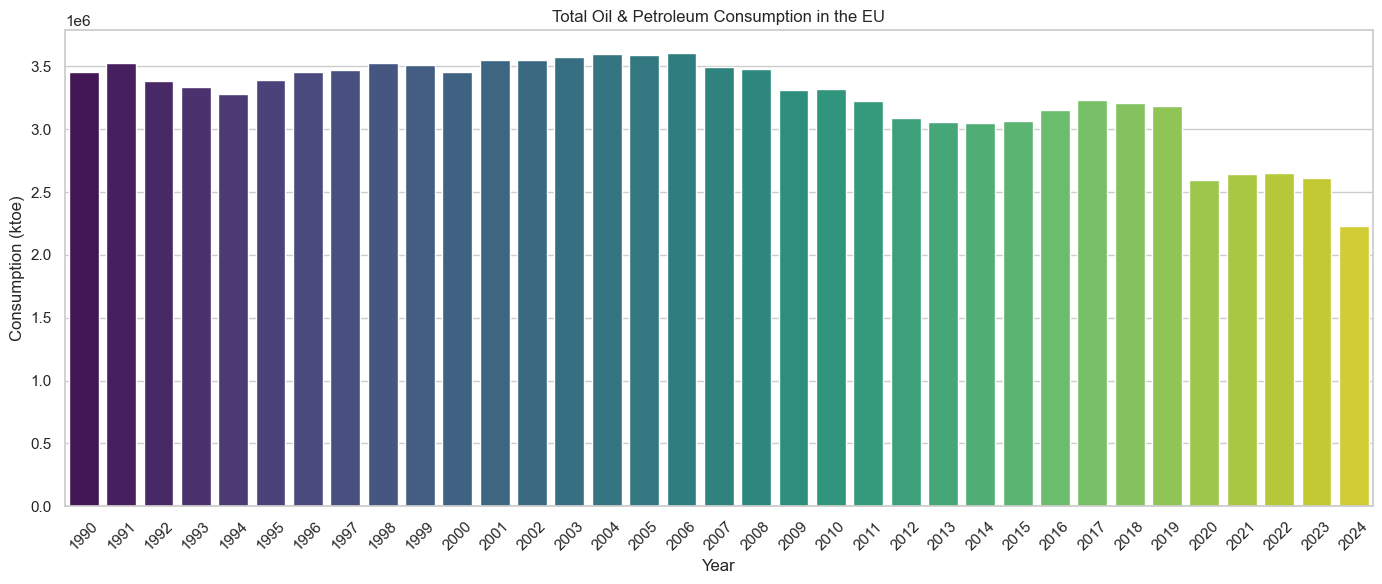

In [52]:
# Sum all countries for each year for the oil and petroleum dataset
oil_total = oil_petrol_pivot.sum(axis=0)  # sum along rows

# Set seaborn theme
sns.set_theme(style='whitegrid', context='notebook', palette='viridis')

# Convert Series to DataFrame
oil_total_df = oil_total.reset_index()
oil_total_df.columns = ['Year', 'Consumption']

colors = sns.color_palette("viridis", len(oil_total_df))

plt.figure(figsize=(14,6))
sns.barplot(x='Year', y='Consumption', data=oil_total_df, palette=colors, hue= 'Year', legend=False)

plt.title("Total Oil & Petroleum Consumption in the EU")
plt.xlabel("Year")
plt.ylabel("Consumption (ktoe)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


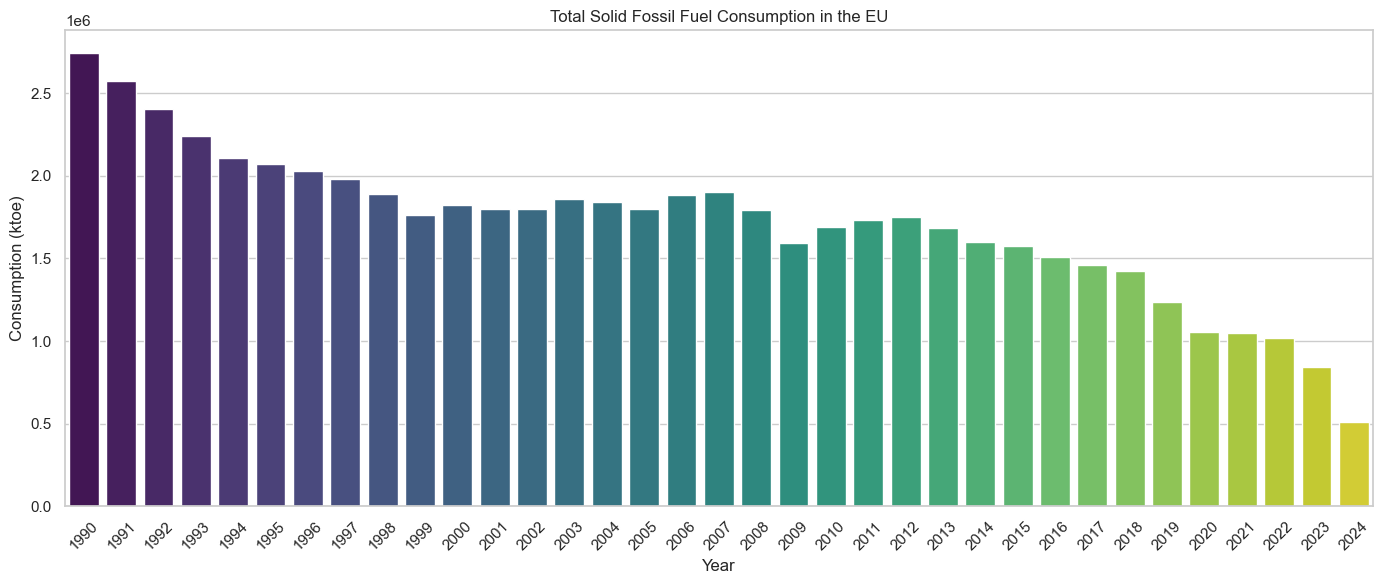

In [53]:
# # Sum all countries for each year for the solid fossil fuels dataset
solid_total = solid_fossil_fuels_pivot.sum(axis=0)  # sum along rows

sns.set_theme(style='whitegrid', context='notebook', palette='viridis')

# Convert Series to DataFrame
solid_total_df = solid_total.reset_index()
solid_total_df.columns = ['Year', 'Consumption']

colors = sns.color_palette("viridis", len(solid_total_df))

plt.figure(figsize=(14,6))
sns.barplot(x='Year', y='Consumption', data=solid_total_df, palette=colors, hue= 'Year', legend=False)

plt.title("Total Solid Fossil Fuel Consumption in the EU")
plt.xlabel("Year")
plt.ylabel("Consumption (ktoe)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

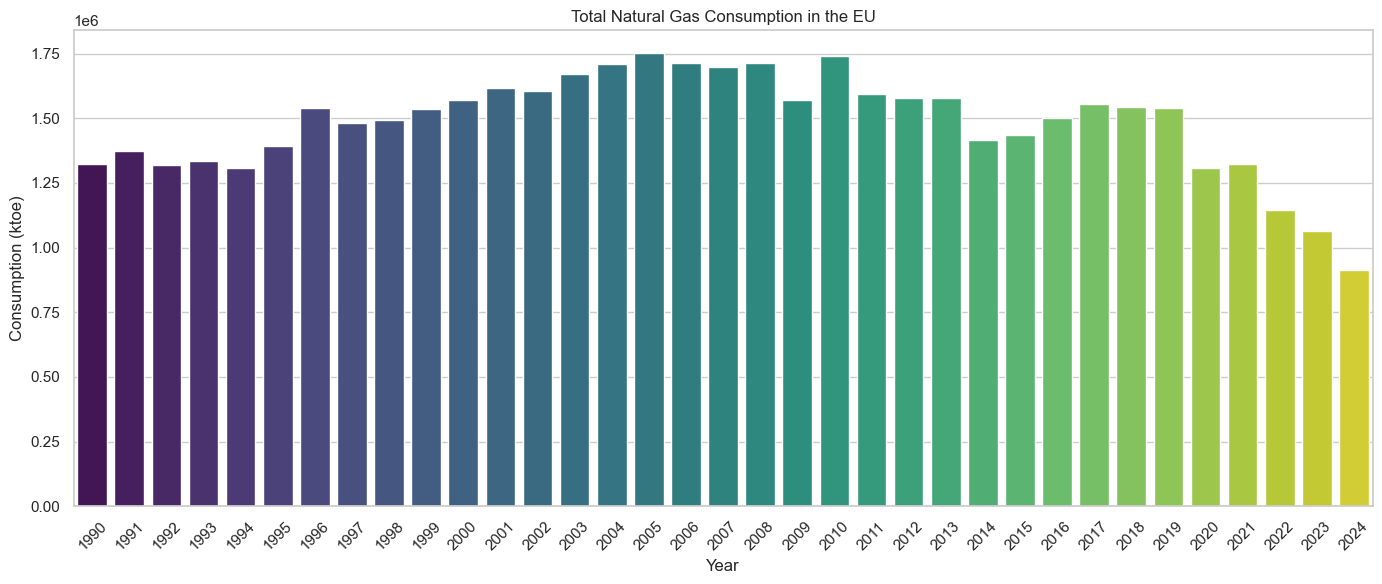

In [54]:
# # Sum all countries for each year for the natural gas dataset
gas_total = natural_gas_pivot.sum(axis=0)  # sum along rows

sns.set_theme(style='whitegrid', context='notebook', palette='viridis')

# Convert Series to DataFrame
gas_total_df = gas_total.reset_index()
gas_total_df.columns = ['Year', 'Consumption']

colors = sns.color_palette("viridis", len(gas_total_df))

plt.figure(figsize=(14,6))
sns.barplot(x='Year', y='Consumption', data=gas_total_df, palette=colors, hue= 'Year', legend=False)

plt.title("Total Natural Gas Consumption in the EU")
plt.xlabel("Year")
plt.ylabel("Consumption (ktoe)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

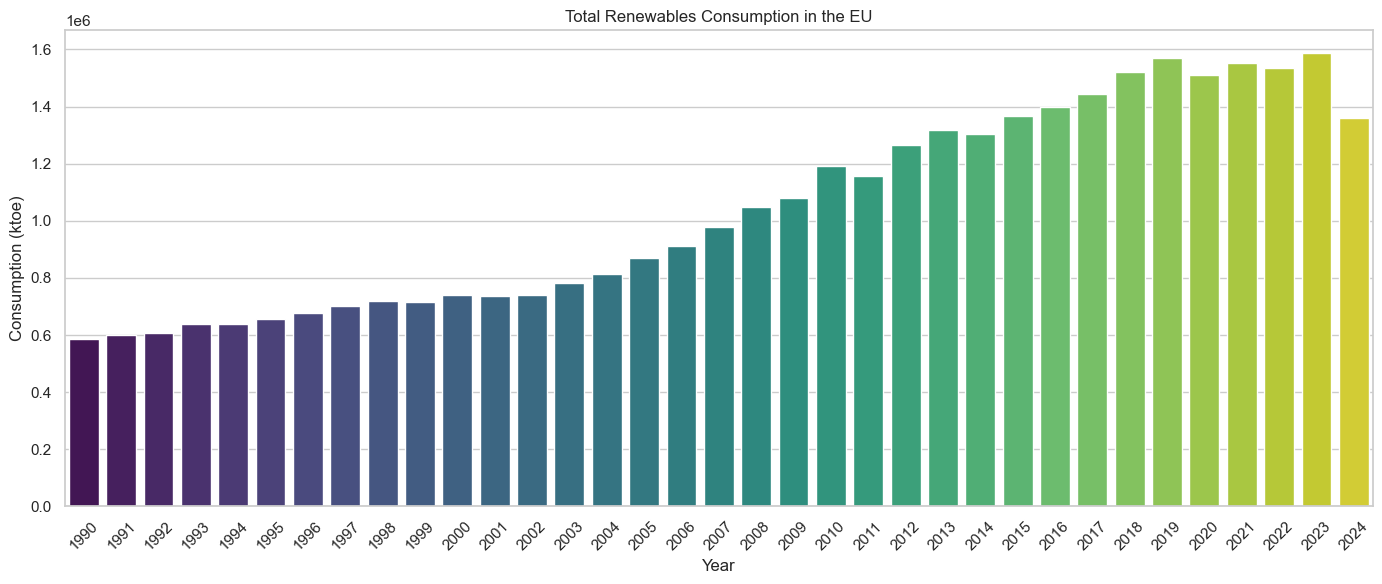

In [55]:
# # Sum all countries for each year for the renewables dataset
renew_total = renewables_pivot.sum(axis=0)  # sum along rows

sns.set_theme(style='whitegrid', context='notebook', palette='viridis')

# Convert Series to DataFrame
renew_total_df = renew_total.reset_index()
renew_total_df.columns = ['Year', 'Consumption']

# Create a color palette matching the number of bars
colors = sns.color_palette("viridis", len(renew_total_df))

plt.figure(figsize=(14,6))
sns.barplot(x='Year', y='Consumption', data=renew_total_df, palette=colors, hue= 'Year', legend=False)

plt.title("Total Renewables Consumption in the EU")
plt.xlabel("Year")
plt.ylabel("Consumption (ktoe)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

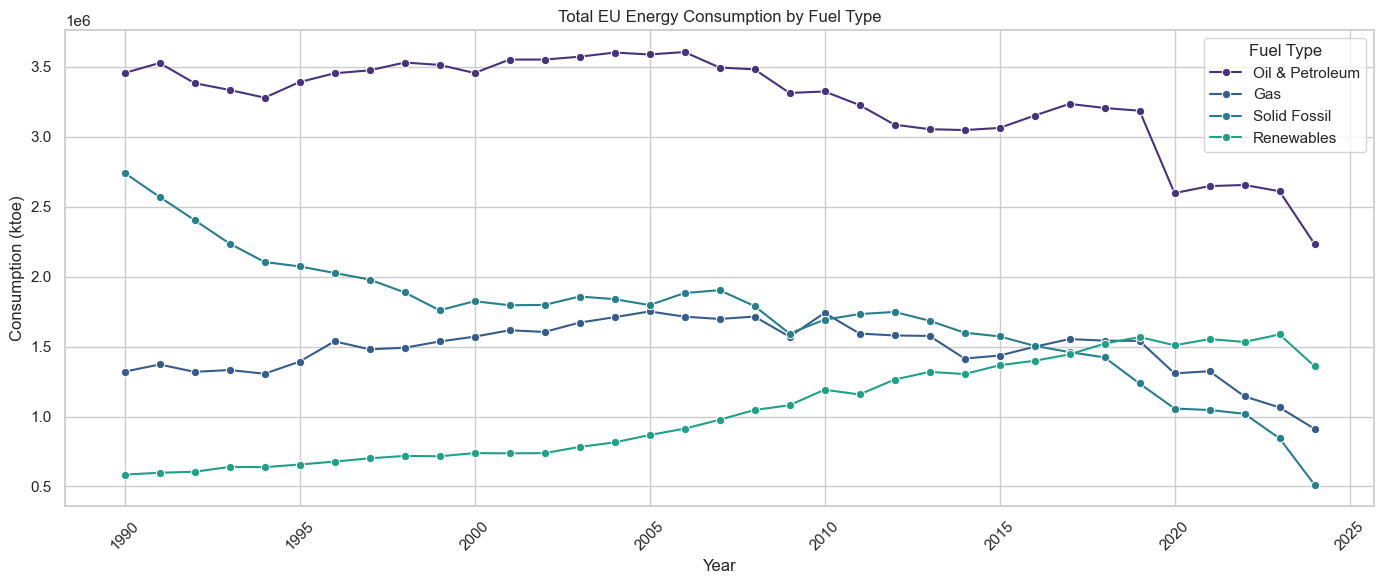

In [56]:
# Combine all fuel types into a single DataFrame for comparison
energy_total = pd.DataFrame({
    'Year': oil_total.index,
    'Oil & Petroleum': oil_total.values,
    'Gas': gas_total.values,
    'Solid Fossil': solid_total.values,
    'Renewables': renew_total.values
})
# Melt the DataFrame to long format for seaborn
energy_long = energy_total.melt(id_vars='Year',
                                var_name='Energy',
                                value_name='Consumption')


plt.figure(figsize=(14,6))
sns.lineplot(data=energy_long, x='Year', y='Consumption', hue='Energy', marker='o')

plt.title("Total EU Energy Consumption by Fuel Type")
plt.xlabel("Year")
plt.ylabel("Consumption (ktoe)")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")
plt.tight_layout()
plt.show()


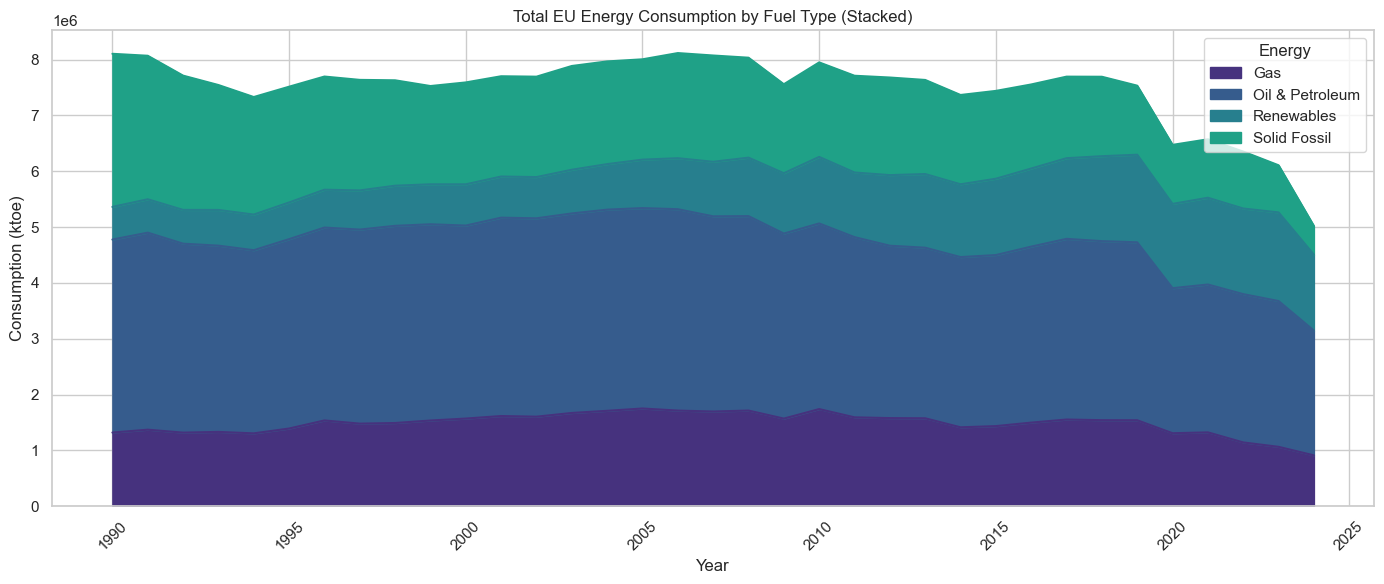

In [57]:
# Pivot back to wide format with Year as index
energy_total_wide = energy_long.pivot(index='Year', columns='Energy', values='Consumption')

# Plot
energy_total_wide.plot(kind='area', stacked=True, figsize=(14,6))

plt.title("Total EU Energy Consumption by Fuel Type (Stacked)")
plt.ylabel("Consumption (ktoe)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Function to plot heatmaps for each fuel type
def plot_heatmap(pivot_df, fuel_name, top_n=None):
    plt.figure(figsize=(18,10))

    # If top_n is specified, select top N countries by total consumption
    if top_n:
        # function sums across columns (years) to get total consumption per country, selects top N and gets their indices
        top_countries = pivot_df.sum(axis=1).nlargest(top_n).index
        # Select only these countries for the heatmap
        data = pivot_df.loc[top_countries]
    # Otherwise use all countries
    else:
        data = pivot_df

    sns.heatmap(data, cmap="YlGnBu", linewidths=0.5, annot=False)
    plt.title(f"{fuel_name} Consumption by Country and Year")
    plt.xlabel("Year")
    plt.ylabel("Country")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


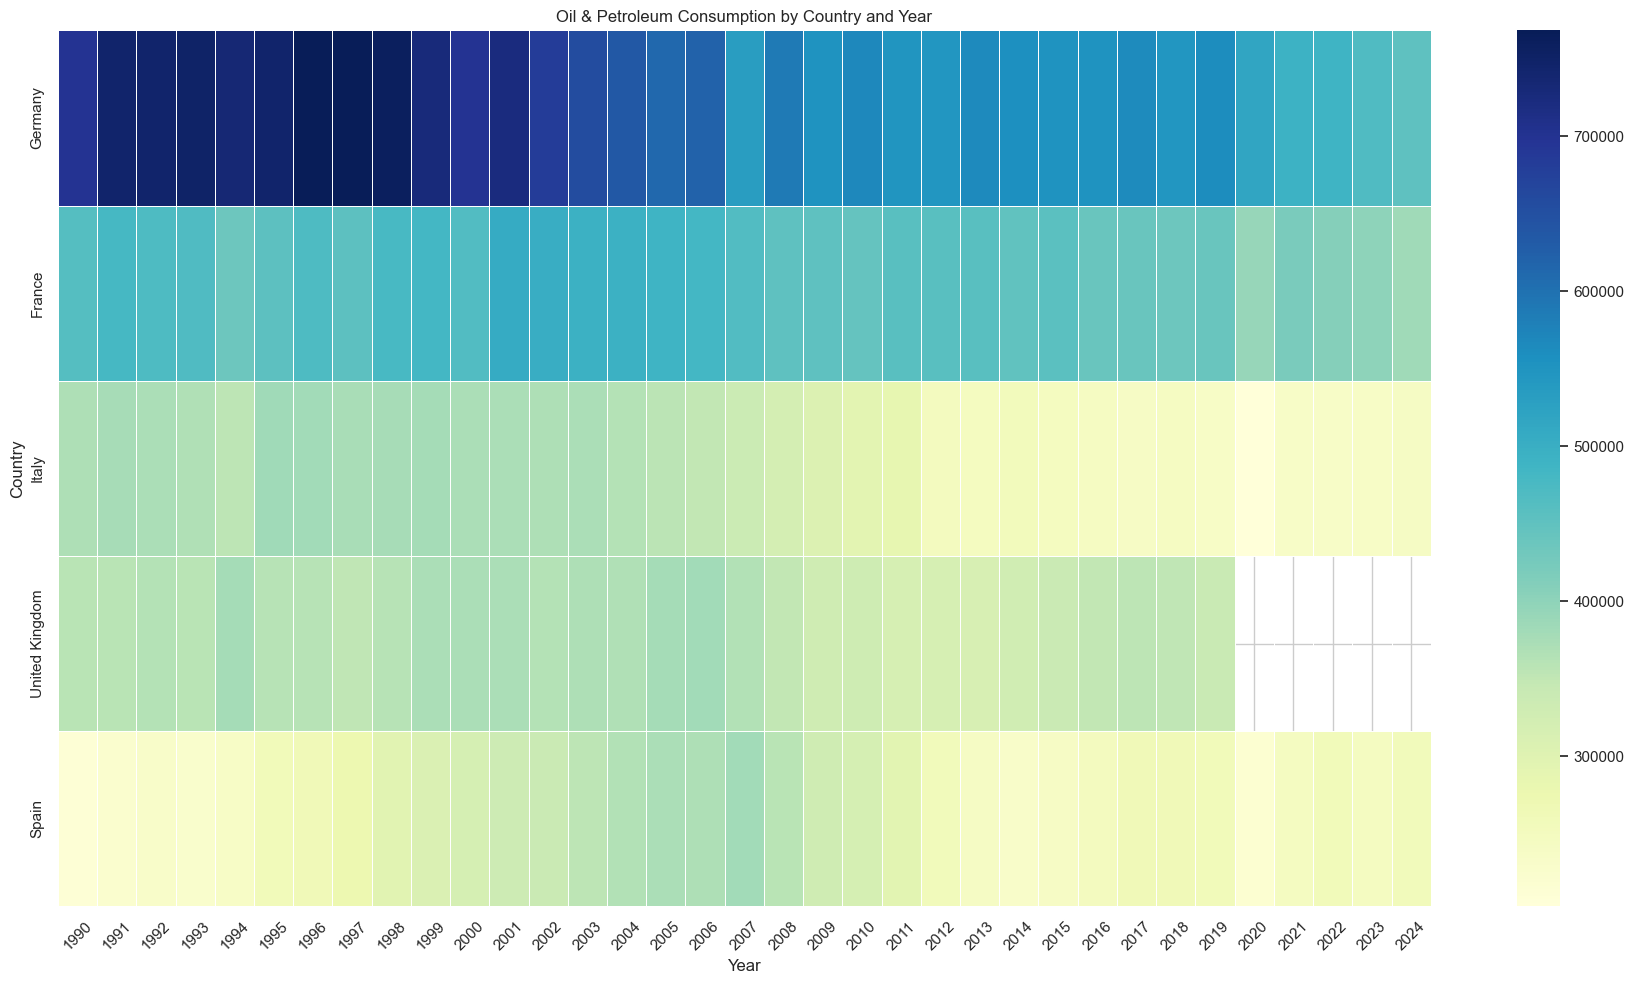

In [59]:
# Plot heatmap for Oil & Petroleum
plot_heatmap(oil_petrol_pivot, "Oil & Petroleum", top_n=5)

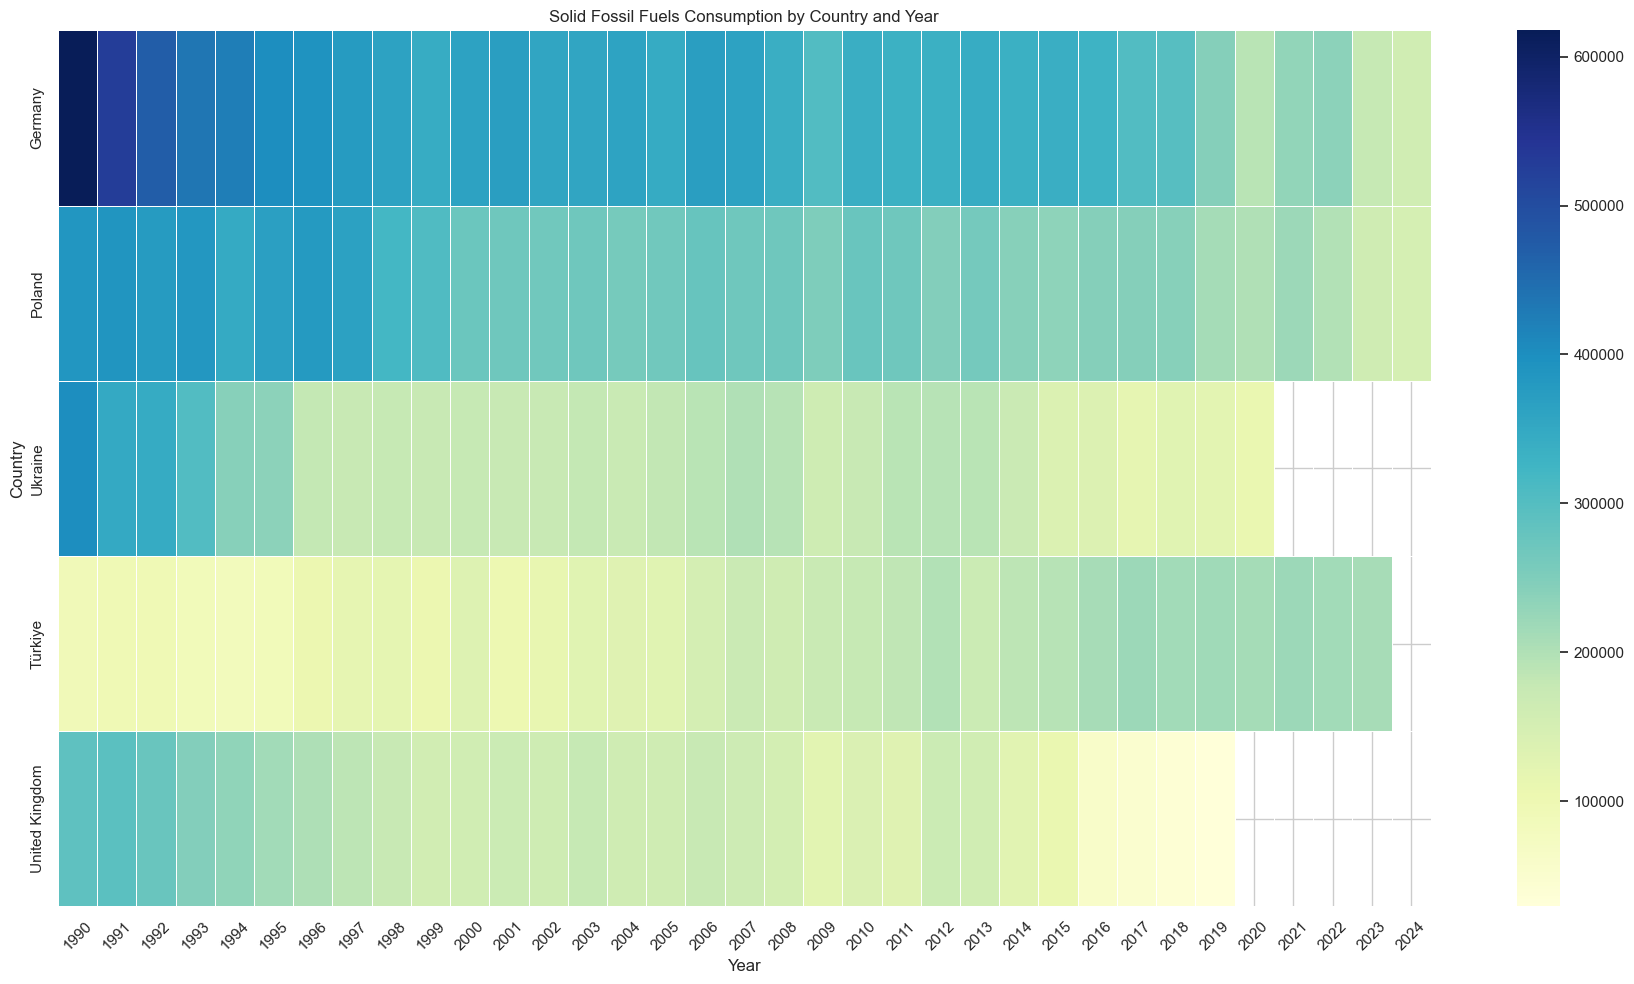

In [60]:
# Plot heatmap for Solid Fossil Fuels
plot_heatmap(solid_fossil_fuels_pivot, "Solid Fossil Fuels", top_n=5)

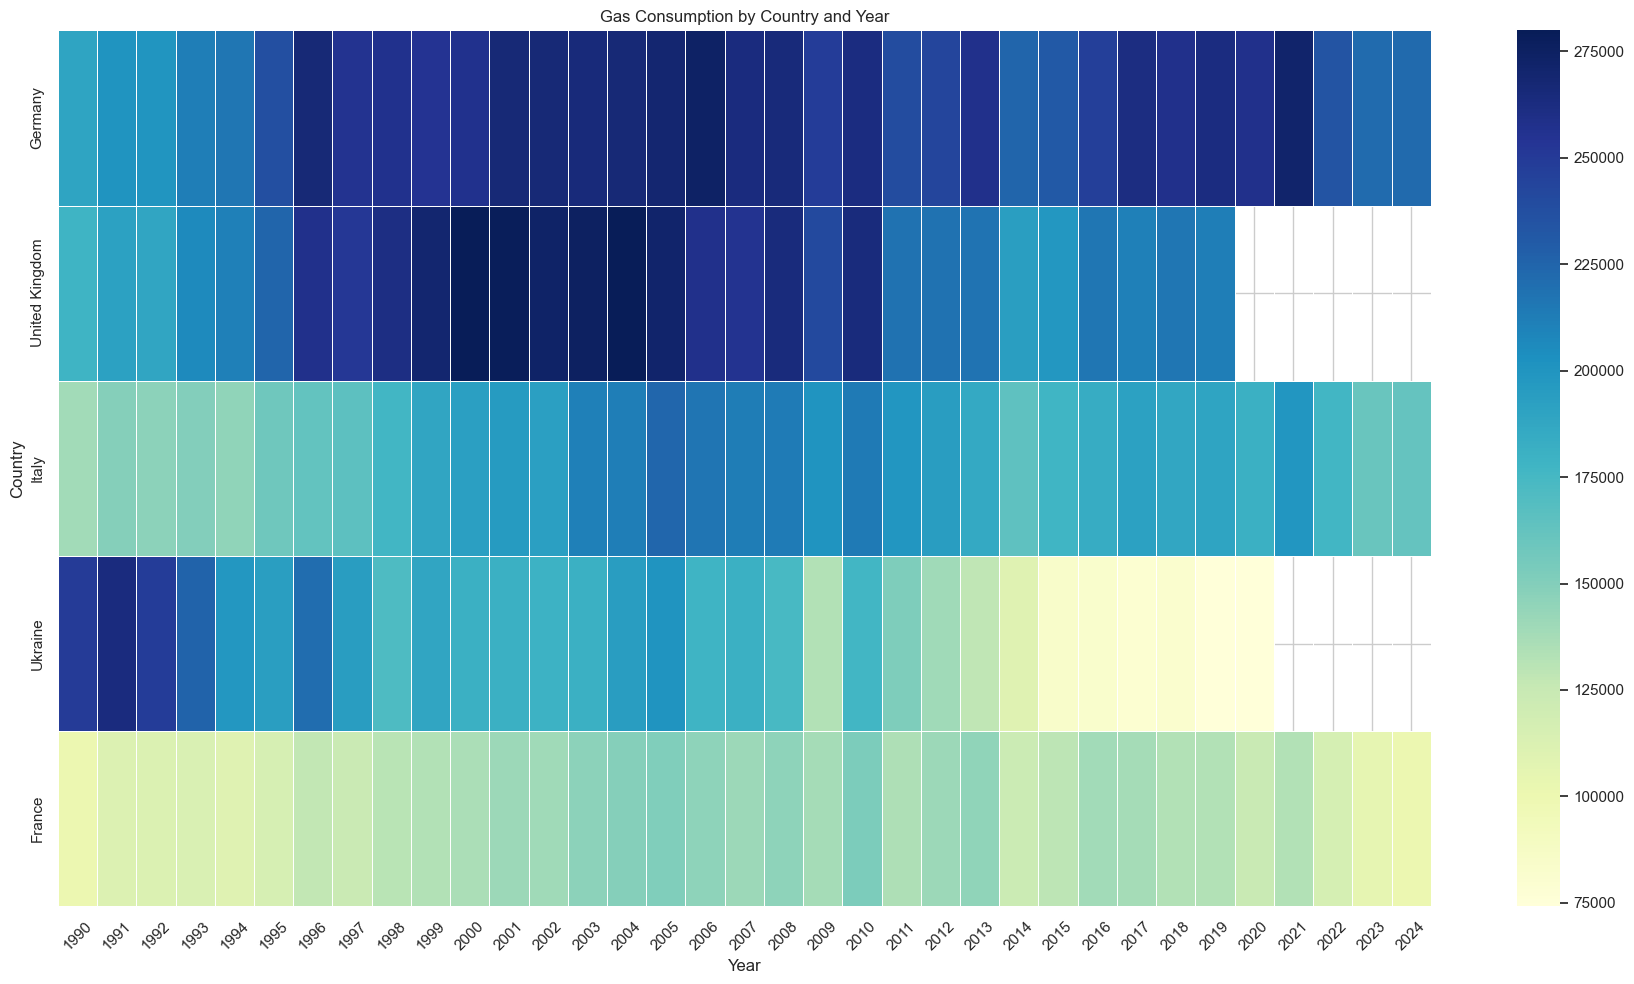

In [61]:
# Plot heatmap for Natural Gas
plot_heatmap(natural_gas_pivot, "Gas", top_n=5)

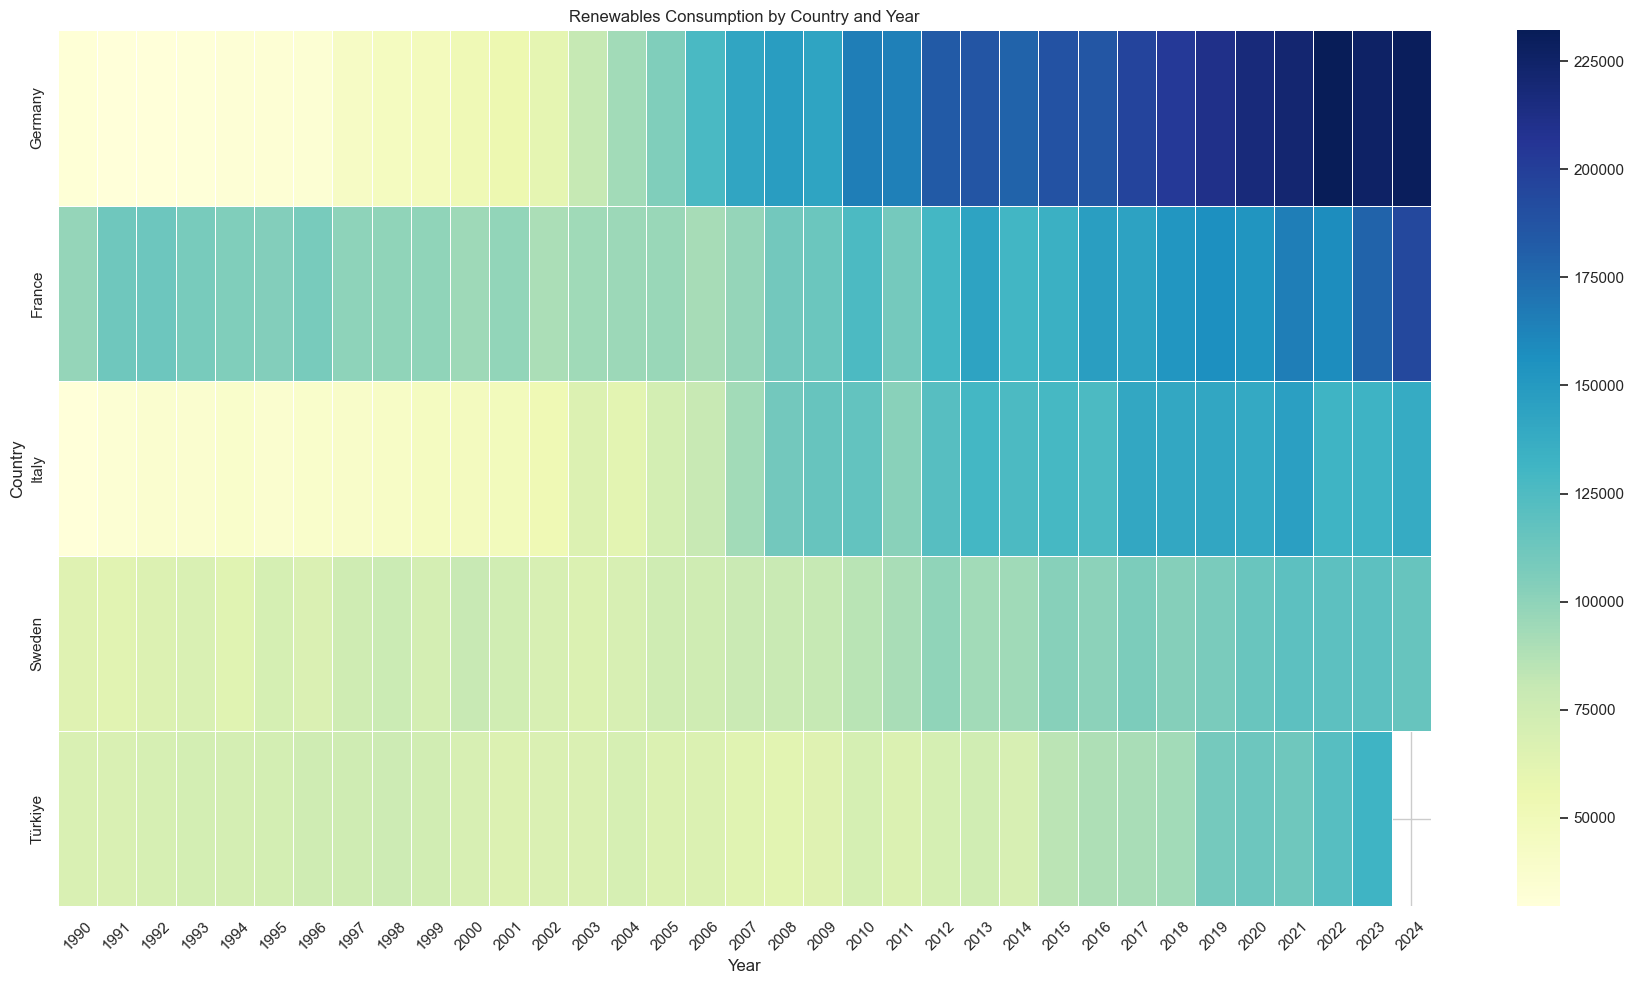

In [62]:
# Plot heatmap for Renewables
plot_heatmap(renewables_pivot, "Renewables", top_n=5)